<a href="https://colab.research.google.com/github/AndresCMontejo/TelecomX_proyecto_parte2/blob/main/Proyecto_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICCIÓN DE CANCELACIÓN**

### **Misión**

 Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

### **Objetivo del desafío**
1.- Preparar los datos para el modelado (tratamiento, codificación, normalización).

2.- Realizar análisis de correlación y selección de variables.

3.- Entrenar dos o más modelos de clasificación.

4.- Evaluar el rendimiento de los modelos con métricas.

5.- Interpretar los resultados, incluyendo la importancia de las variables.

6.- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

### **Practicas**

✅ Preprocesamiento de datos para Machine Learning

✅ Construcción y evaluación de modelos predictivos

✅ Interpretación de resultados y entrega de insights

✅ Comunicación técnica con enfoque estratégico

## **Importando libreria de Pandas**

In [66]:
import pandas as pd

## **Extracción del Archivo Tratado**

In [67]:
df = pd.read_csv('/content/drive/MyDrive/ETL/datos_tratados_TelecomX.csv')

In [68]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Eliminación de Columnas Irrelevantes**

Eliminando las columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

**Columnas a eliminar**
Analizando el dataframe, observamos que las columnas que conviene eliminar (ID/identificadores) son las customerID, phone, account, ya que estos son identificadores o datos de contacto que no aportan señal predictiva y pueden meter ruido a nuestro analisis.

In [69]:
drop_now = ["customerID", "phone", "account"]
df = df.drop(columns=drop_now, errors="ignore")

# Separando X y Y
target_col = "Churn"
y = df[target_col]
X = df.drop(columns=[target_col], errors="ignore")

# Guardando un nuevo dataFrame con una versión mas limpia
df.to_csv("datos_TelecomX_sin_IDs_constantes.csv", index=False)

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [70]:
# Cargando nuestro nuevo DataFrame filtrado.
df = pd.read_csv("/content/drive/MyDrive/ETL/datos_TelecomX_sin_IDs_constantes.csv")

# Identificando las columnas categóricas (object o category)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas categóricas detectadas:", categorical_cols)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Forma del dataset original:", df.shape)
print("Forma del dataset codificado:", df_encoded.shape)

# Guardando el nuevo dataframe transformado
df_encoded.to_csv("datos_TelecomX_codificado.csv", index=False)

Columnas categóricas detectadas: ['Churn', 'customer', 'internet']
Forma del dataset original: (7267, 3)
Forma del dataset codificado: (7267, 1019)


## **Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Conteo de clases (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases (Churn):
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


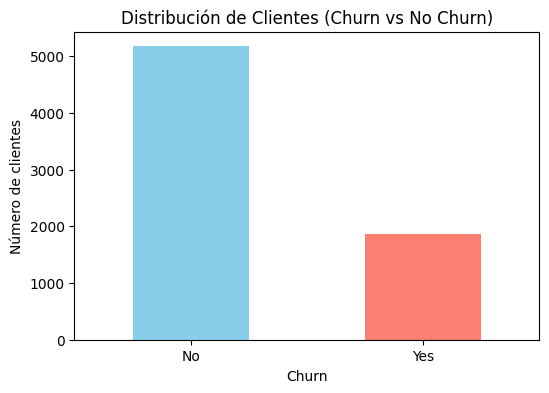

In [71]:
#Distribución de la variable objetivo (Churn)
#df = pd.read_csv('/content/datos_TelecomX_codificado.csv')
churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True)

print("Conteo de clases (Churn):")
print(churn_counts)
print("\nProporción de clases (Churn):")
print(churn_proportion)

# Visualización rápida
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Clientes (Churn vs No Churn)")
plt.xticks(rotation=0)
plt.ylabel("Número de clientes")
plt.show()

## **Balanceo de Clases**

Profundizar en el análisis, aplicando técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

#### **Preparación de Datos (Extensión de tu Código)**
Primero, asegurémonos de que los datos estén codificados y separados en X (features) e y (target):

In [76]:
from sklearn.model_selection import train_test_split
# Cargar datos (usando tu DataFrame ya codificado)
df_encoded = pd.read_csv('/content/datos_TelecomX_sin_IDs_constantes.csv')

# Separar X e y (asumiendo que 'Churn' es la columna objetivo)
y = df_encoded['Churn']
X = df_encoded.drop(columns=['Churn'])

# Codificar 'Churn' como 0 y 1 (si no está ya codificado)
y = y.map({'No': 0, 'Yes': 1})

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribución original en entrenamiento:", y_train.value_counts())
print("Distribución original en prueba:", y_test.value_counts())


Distribución original en entrenamiento: Churn_Yes
False    4318
True     1495
Name: count, dtype: int64
Distribución original en prueba: Churn_Yes
False    1080
True      374
Name: count, dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar datos usando el Dataframe codificado
df_encoded = pd.read_csv('/content/datos_TelecomX_codificado.csv')

# Separar X e y
y = df_encoded['Churn_Yes']
X = df_encoded.drop(columns=['Churn_Yes'])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribución original en entrenamiento:", y_train.value_counts())
print("Distribución original en prueba:", y_test.value_counts())

Distribución original en entrenamiento: Churn_Yes
False    4318
True     1495
Name: count, dtype: int64
Distribución original en prueba: Churn_Yes
False    1080
True      374
Name: count, dtype: int64


#### **Técnicas de Balanceo**
Random Undersampling (Reducción de la clase mayoritaria)

In [78]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print("Distribución después de undersampling:", y_under.value_counts())

Distribución después de undersampling: Churn_Yes
False    1495
True     1495
Name: count, dtype: int64


SMOTE (Oversampling de la clase minoritaria)

In [82]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_train_numeric = X_train.astype(int)
# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_train_numeric, y_train)
print("Distribución después de SMOTE:", Counter(y_over))

Distribución después de SMOTE: Counter({False: 4318, True: 4318})


Combinación SMOTE + Undersampling (SMOTEENN)

In [86]:
from imblearn.combine import SMOTEENN
X_train_numeric = X_train.astype(int)
# Aplicar SMOTEENN (SMOTE + ENN para limpiar muestras)
smote_enn = SMOTEENN(random_state=42)
X_comb, y_comb = smote_enn.fit_resample(X_train_numeric, y_train)
print("Distribución después de SMOTEENN:", y_comb.value_counts())

Distribución después de SMOTEENN: Churn_Yes
True     3295
False     556
Name: count, dtype: int64


#### **Evaluación de Modelos con Datos Balanceados**
Ahora podemos entrenar un modelo, y comparar su rendimiento antes y después del balanceo.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo con datos originales (desbalanceados)
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print("=== Rendimiento en datos originales (desbalanceados) ===")
print(classification_report(y_test, y_pred_original))
print(confusion_matrix(y_test, y_pred_original))

# Modelo con SMOTE (oversampling)
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_over, y_over)
y_pred_smote = model_smote.predict(X_test)

print("\n=== Rendimiento con SMOTE (oversampling) ===")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

=== Rendimiento en datos originales (desbalanceados) ===
              precision    recall  f1-score   support

       False       0.81      0.91      0.86      1080
        True       0.61      0.39      0.48       374

    accuracy                           0.78      1454
   macro avg       0.71      0.65      0.67      1454
weighted avg       0.76      0.78      0.76      1454

[[987  93]
 [227 147]]

=== Rendimiento con SMOTE (oversampling) ===
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      1080
        True       0.48      0.66      0.56       374

    accuracy                           0.73      1454
   macro avg       0.67      0.71      0.68      1454
weighted avg       0.77      0.73      0.74      1454

[[814 266]
 [126 248]]


#### **Visualización de Resultados**

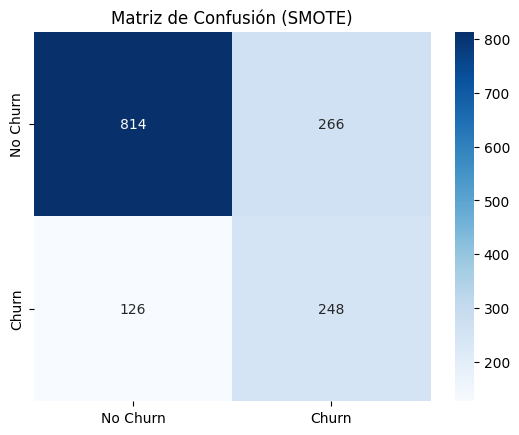

In [88]:
import seaborn as sns
# Matriz de confusión para SMOTE
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matriz de Confusión (SMOTE)")
plt.show()

#### **Interpretación**
La interpretación es la siguiente
Undersampling: Reduce la clase mayoritaria, pero al reducir, esta puede perder información útil.

SMOTE: Genera muestras sintéticas de la clase minoritaria, mejorando el recall (detección de churn).

SMOTEENN: Combina oversampling y limpieza de muestras ruidosas.

Métrica clave:
Foco en Recall (capacidad de detectar clientes que cancelarán).
Compara el classification_report antes/después del balanceo.

## **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas a escalar:", numeric_cols)

Columnas numéricas a escalar: []
